Loaded Iris data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

Missing values check:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

Normalized data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111     

<Figure size 1000x800 with 0 Axes>

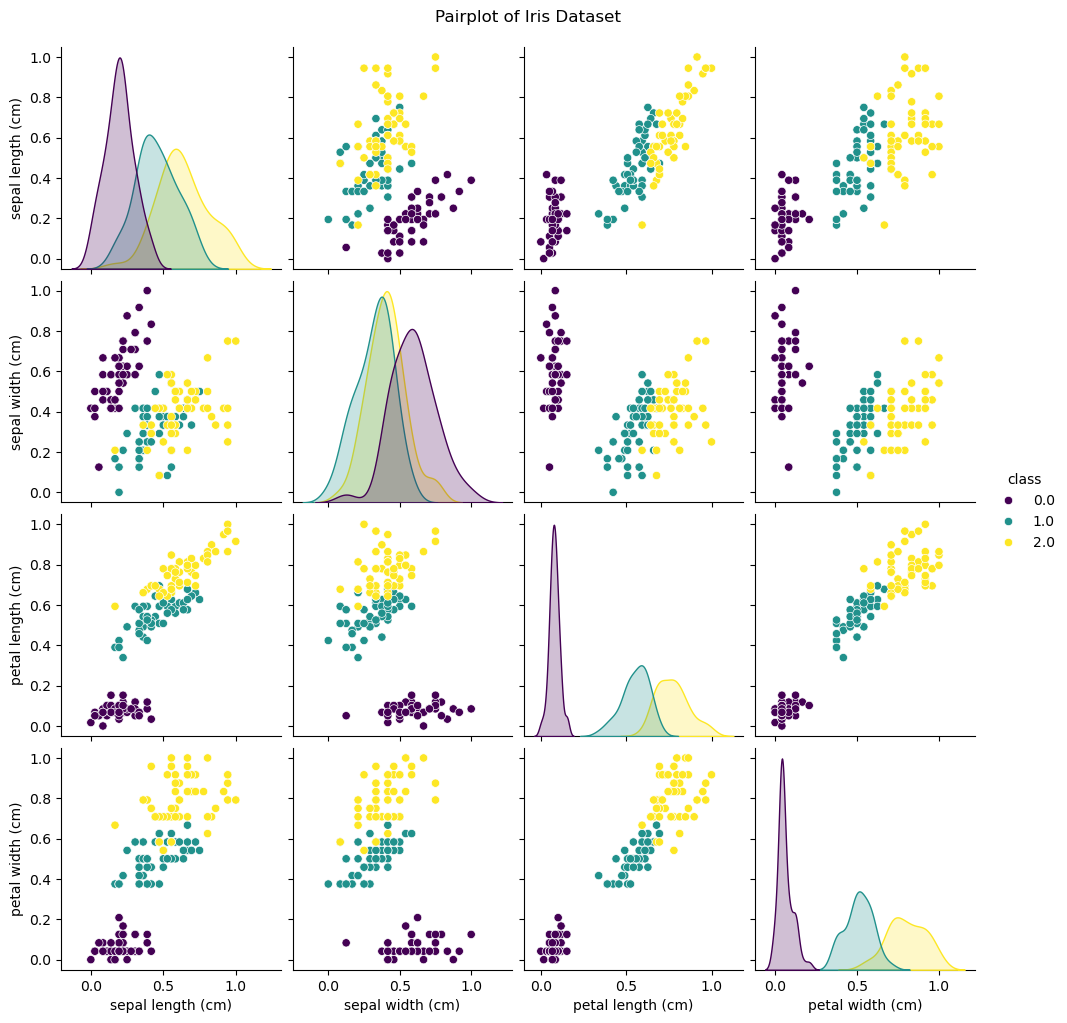

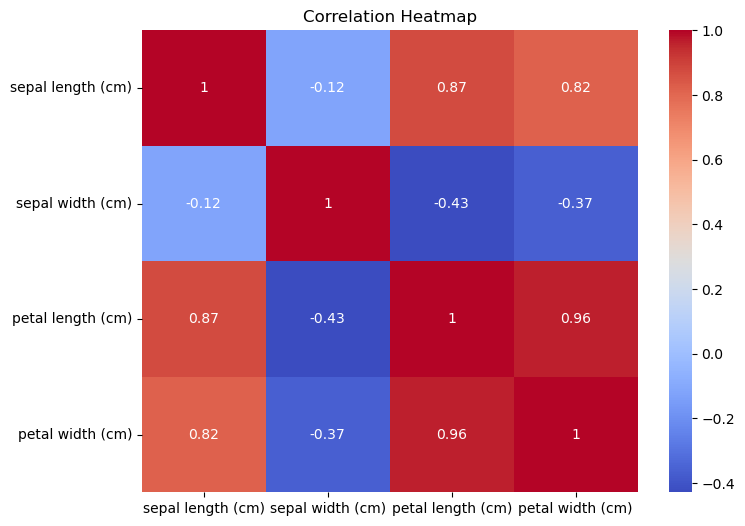

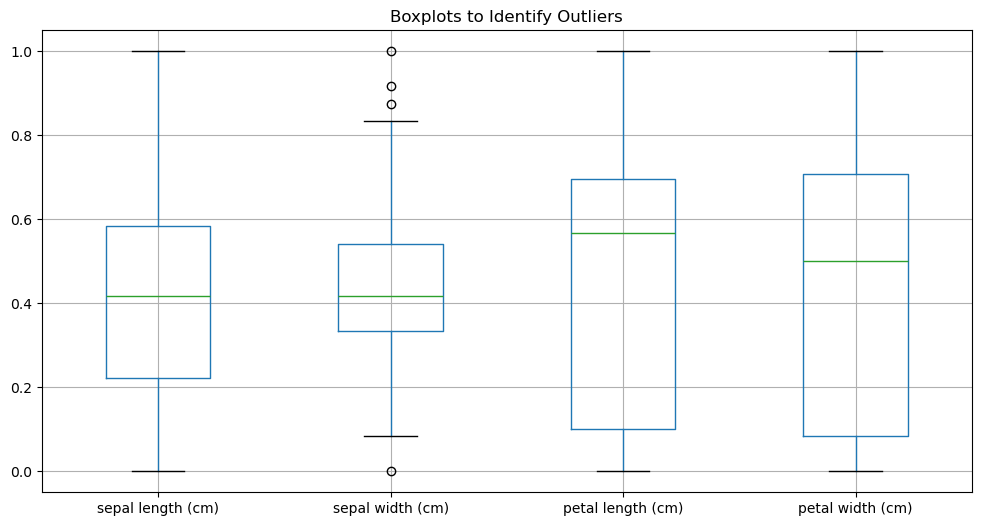


Data split: 120 training samples, 30 testing samples.


In [1]:
# preprocessing_iris.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

def load_iris_data():
    """Loads the Iris dataset from scikit-learn."""
    iris = load_iris()
    df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                      columns=iris['feature_names'] + ['class'])
    return df

def split_data(df, test_size=0.2):
    """Splits the data into training and testing sets."""
    X = df.drop('class', axis=1)
    y = df['class']
    return train_test_split(X, y, test_size=test_size, random_state=42)

if __name__ == '__main__':
    # 1. Load the Iris dataset
    iris_df = load_iris_data()
    print("Loaded Iris data head:")
    print(iris_df.head())

    # 2. Preprocessing
    
    # Check for missing values (demonstrate the check)
    print("\nMissing values check:")
    print(iris_df.isnull().sum())

    # Normalize features using Min-Max scaling
    scaler = MinMaxScaler()
    feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])
    print("\nNormalized data head:")
    print(iris_df.head())

    # 3. Exploration
    
    # Compute summary statistics using pandas.describe()
    print("\nSummary statistics:")
    print(iris_df.describe())

    # Visualize with a pairplot and correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.pairplot(iris_df, hue='class', palette='viridis')
    plt.suptitle("Pairplot of Iris Dataset", y=1.02)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(iris_df[feature_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
    
    # Identify potential outliers using boxplots
    plt.figure(figsize=(12, 6))
    iris_df.drop('class', axis=1).boxplot()
    plt.title("Boxplots to Identify Outliers")
    plt.show()
    
    # 4. Split data into train/test
    X_train, X_test, y_train, y_test = split_data(iris_df)
    print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")